Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# Analysis of 2D and 3D frame structure under seismic load.

### Daniel Barbosa Mapurunga Matos (PPGEC/UFRGS)

In [1]:
import numpy as np
import Vibmec as Vib
import matplotlib.pyplot as plt 
import scipy
from scipy import signal


## 1. Introduction

This notebook studies the behavior of a ten floor building under seismic load. The building is fixed in a rock foundation and is made from 25 Mpa reinforced concrete. The 2D frame is made from 70 bars and 44 nodes, each one with 3 degree of freedom. The seismic load is generated from the Kanai-Tajimi spectrum. 


## 2. The process

First of all, the stifiness matrix and the massa matrix are build from the database spreadsheet

In [2]:
K,M = Vib.Matriz('Resources/X.xlsx',44)  # Importing 2D frame from resources

Then, the nodes that are restricted are set on a list, making possible to build te restricted matrix $K_R$ and $M_R$.

In [3]:
Ld = (0,1,2,3,4,5,6,7,8,9,10,11)

Kr,Mr = Vib.Restr(K,M,Ld)

Now, with the restricted matrix, its possible to calculate the eigenvalues and eigenvectors, without any numerical problem.

1 ª frequencia natural = 1.33Hz 

2 ª frequencia natural = 4.06Hz 

3 ª frequencia natural = 7.09Hz 



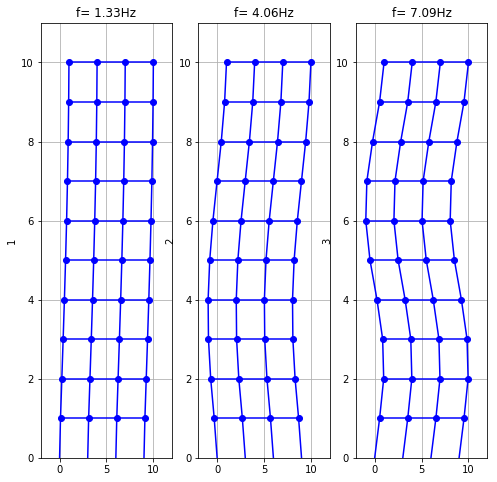

In [4]:
fk,wk = Vib.Eig(Kr,Mr,3,3,10)

The eigenvalues corresponds to the natural vibration frequencys of the 2D building, and, with these values, its possible to build, now, the Damper matrix. In this study, its used the Rayleigh Matrix, with $ \zeta_1 = \zeta_2 = 0.01$

In [5]:
Cr = Vib.Rayleigh(Kr,Mr,wk,0.01,0.01)

To visualise the consistence of stifness, mass and damping matrices, it's possible to plot then and verify if they have some problem

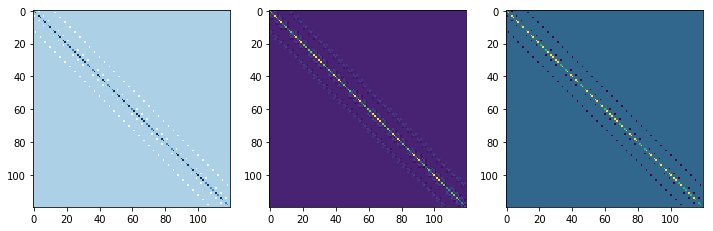

In [6]:
plt.figure(1,figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(Kr,'Blues')
plt.subplot(1,3,2)
plt.imshow(Mr)
plt.subplot(1,3,3)
plt.imshow(Cr)

Now that the system's characteristics are ready, its necessary to build the seismic load. To make it possible, its used the Kanai-Tajimi spectrum and the Shinozuka and Jan equation to bring it to time domain

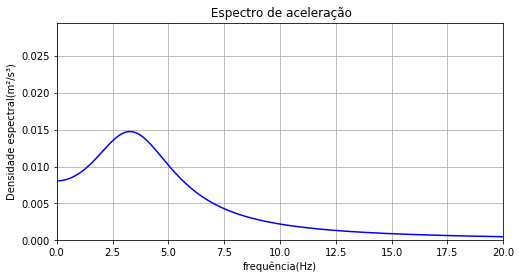

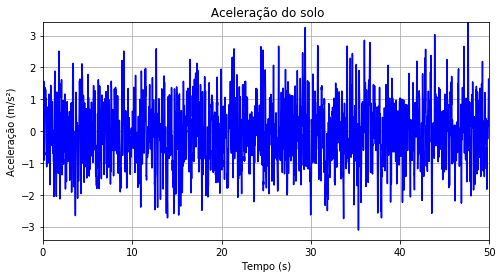

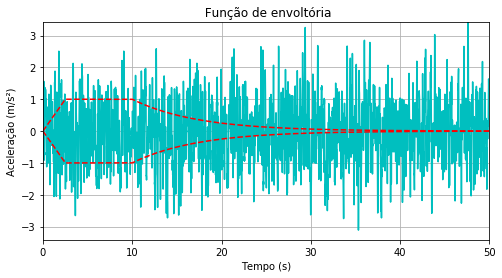

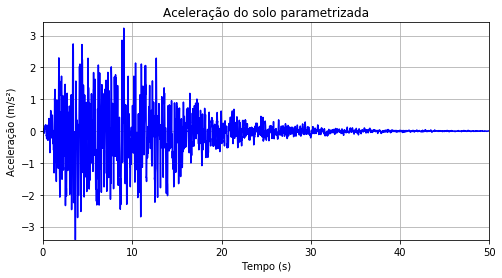

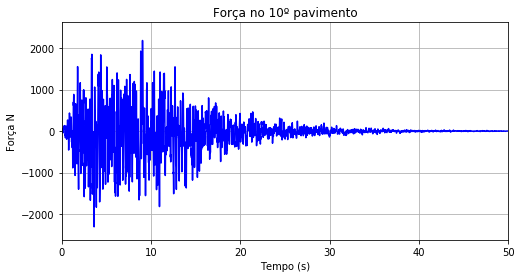

In [7]:
t, age,test = Vib.Kanai_Tajimi(0.348,'rocha',50,0.01)

F = Vib.Sismo(Mr,age,t)

Note that a envoltory function its used to make the process non-estacionary and note that the load is proportional to the soil acceleration.

Now, its possible to solve the Dynamic equilibrium equation:
\begin{align}
m\ddot{u} + c\dot{u} + ku = F
\end{align}
This equation is solved using the Nermark's method.

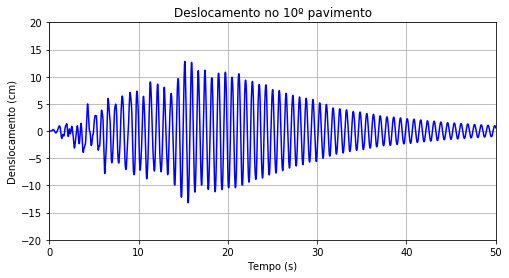

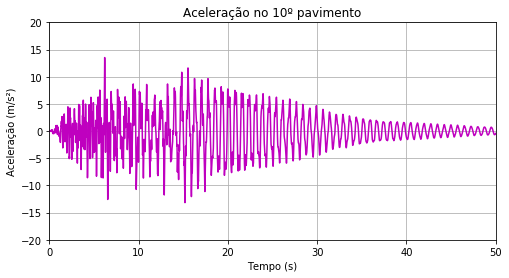

In [8]:
d,v,a = Vib.Newmark(Kr,Mr,Cr,F,t)

plt.figure(10,figsize=(8,4))

plt.plot(t,d[117,:]*100,'b')
plt.xlabel('Tempo (s)'); plt.ylabel('Denslocamento (cm)');
plt.xlim(0,50); plt.ylim(-20,20); plt.title('Deslocamento no 10º pavimento')
plt.grid(True) 

plt.figure(11,figsize=(8,4))
plt.plot(t,a[117,:] ,'m') 
plt.xlabel('Tempo (s)'); plt.ylabel('Aceleração (m/s²)');
plt.xlim(0,50); plt.ylim(-20,20); plt.title('Aceleração no 10º pavimento')
plt.grid(True)

Now, to visualize the natural frequencys of the system, it will be used ``Scipy`` to plot the periodogram

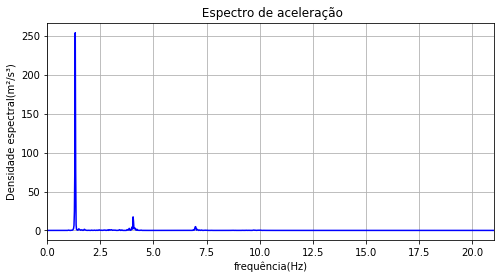

In [9]:
plt.figure(16,figsize=(8,4))
f,Saz = scipy.signal.periodogram(a[117,:],(len(a[117,:])/np.max(t)))
plt.plot(f,Saz,'b')
plt.xlabel('frequência(Hz)'); plt.ylabel('Densidade espectral(m²/s³)');
plt.xlim(0,21); plt.title(' Espectro de aceleração')
plt.grid(True)

In [10]:
f_max1 =f[Saz.argmax()]
f_max2 =f[137:][Saz.argmax()]

print(' The natural frequencys are:','\n',
     '  F 1:               {0:5.2f}hz'.format(f_max1),'\n',
     '  F 2:               {0:5.2f}hz'.format(f_max2),'\n'
    )


 The natural frequencys are: 
   F 1:                1.32hz 
   F 2:                4.06hz 



The 3D frame follows the same procedure. The only differences are in the assembly of the stiffness and mass matrices.

1 ª frequencia natural = 1.04Hz 

2 ª frequencia natural = 1.13Hz 



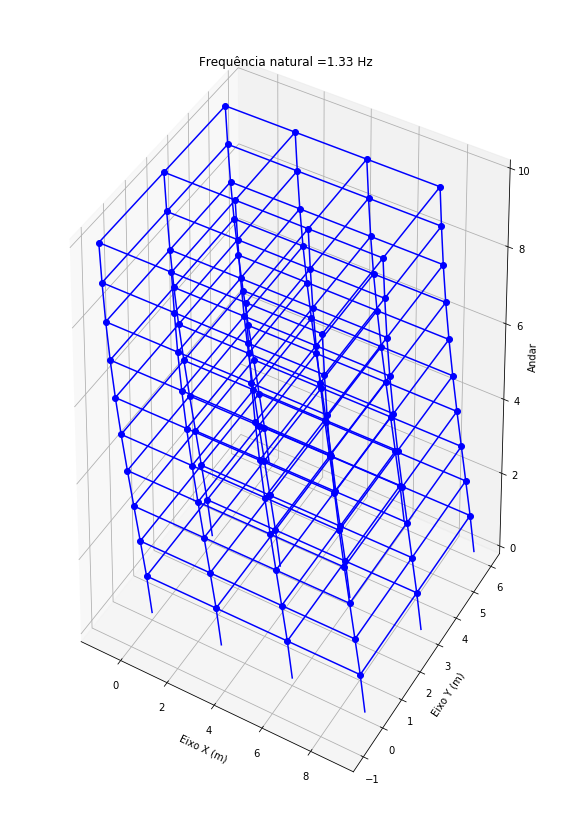

In [6]:
K,M = Vib.Matriz3D('X3D.xlsx',132)

Ld = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

for i in range (24):
    l1 = Ld[i]+265
    Ld.append(l1)
    
for i in range (24):
    l1 = Ld[i]+529
    Ld.append(l1)    

Kr,Mr = Vib.Restr(K,M,Ld)

fk,wk = Vib.Eig3D(Kr,Mr,2,3,10)

Cr = Vib.Rayleigh(Kr,Mr,wk,0.01,0.01)



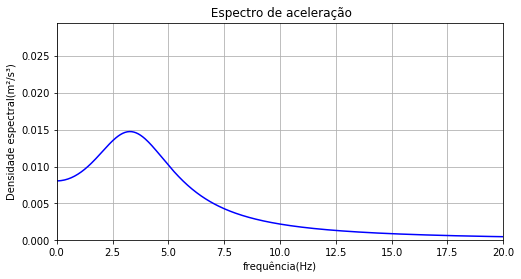

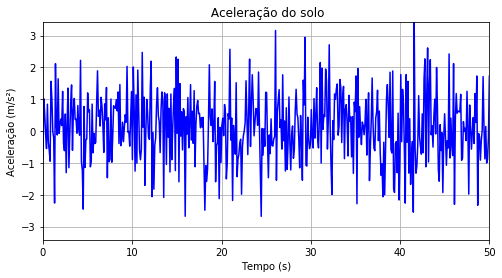

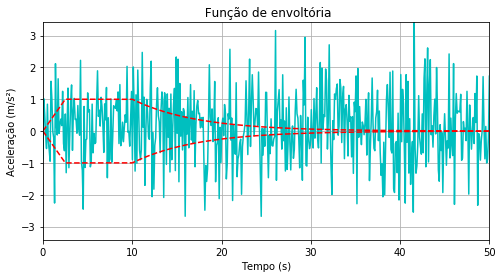

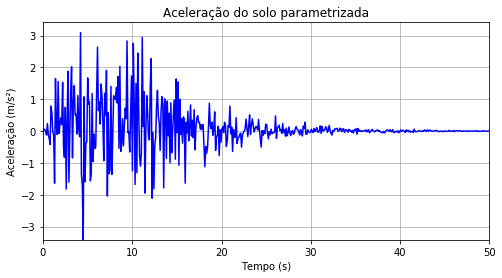

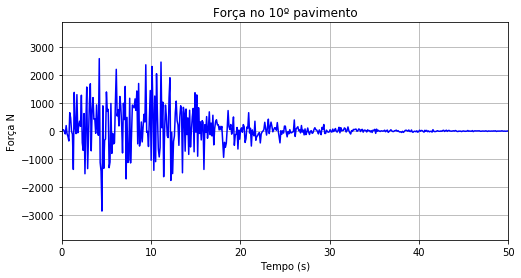

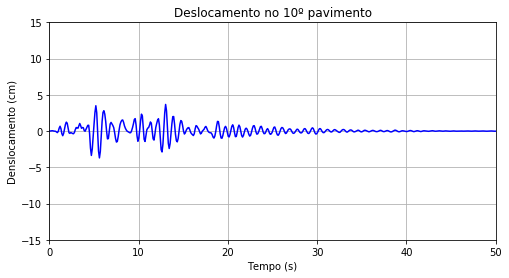

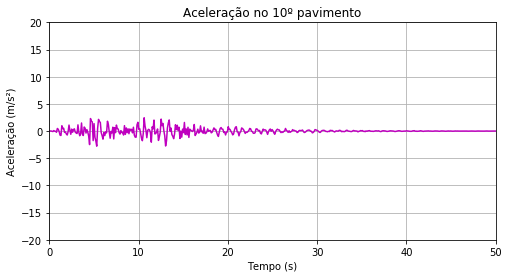

In [4]:

t, age = Vib.Kanai_Tajimi(0.348,'rocha',50,0.1)

F = Vib.Sismo3D(Mr,age,t)

d,v,a = Vib.Newmark(Kr,Mr,Cr,F,t)

plt.figure(10,figsize=(8,4))

plt.plot(t,d[714,:]*100,'b')
plt.xlabel('Tempo (s)'); plt.ylabel('Denslocamento (cm)');
plt.xlim(0,50); plt.ylim(-15,15); plt.title('Deslocamento no 10º pavimento')
plt.grid(True) 

plt.figure(11,figsize=(8,4))
plt.plot(t,a[714,:] ,'m') 
plt.xlabel('Tempo (s)'); plt.ylabel('Aceleração (m/s²)');
plt.xlim(0,50); plt.ylim(-20,20); plt.title('Aceleração no 10º pavimento')
plt.grid(True)


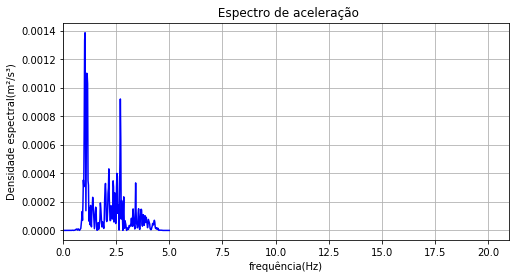

In [5]:
plt.figure(16,figsize=(8,4))
f,Saz = scipy.signal.periodogram(a[117,:],(len(a[117,:])/np.max(t)))
plt.plot(f,Saz,'b')
plt.xlabel('frequência(Hz)'); plt.ylabel('Densidade espectral(m²/s³)');
plt.xlim(0,21); plt.title(' Espectro de aceleração')
plt.grid(True)